<a href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/solved-notebooks/SOLVED-Lab-10_KernelPCA_KernelSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA

from math import sin
from math import cos

from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh


Kernel regression
===============

https://knork.medium.com/linear-regression-in-python-from-scratch-with-kernels-e9c37f7975b9

**Recap**: the solution of the linear regression $y=wX$ can be also written as:

$$
w=(X^{T}X)^{-1}X^{T}y=X^{T}(XX^{T})^{-1}y
$$


Let $X\in R^{N\times d}$, then $X^{T}X\in R^{d\times d}$ and $K=XX^{T}\in R^{N\times N}$: it all depends on the ratio $\frac{d}{N}$ which matrix is more convenient (i.e. less computational demanding) to compute. 

For predictions, we plug the above for a test point $z$ and get:

$$
f(z)=z^{T}w=z^{T} X^{T}(XX^{T})^{-1}y= \alpha^{T}(z)K^{-1}y
$$

with $\alpha(z)=z^{T}X^{T}=K(z,X)\in R^{1\times N}$.

This is the case for linear regression. How can we extend to the non-linear case?  $x\rightarrow \phi(x)$, and the reasoning above repeats.


Also: https://github.com/luigicarratino/Tutorial_Kernels_MLSS2019_London/blob/master/Tutorial%20Kernel.ipynb



## Recap on different kernel functions 

See also: https://www.cs.toronto.edu/~duvenaud/cookbook/

1. **Linear Kernel**: $k(x, y) = <x, y> = x\cdot y$ fast to compute, hence convenient when there are a lot of features and no need to map points in a higher dimensional space. Usually combined with other kernels to increase their expressiveness. 

2. **Polynomial Kernel**: $k(x, y)= (1 + x\cdot y)^p$ ($p$ is the degree) non-linear function if $p>1$, it allows to cnsider interactions among features up to order $p$.

3. **Radial Basis Funtion / Gaussian Kernel**: $k(x, y) = \bigg( -\frac{||x - y||_2}{2 \sigma^2} \bigg)$ it is arguably the most used, as it can map points potentially to infinite dimenional space (think about Taylor expansion) hence it is potentially able to fit any dataset. 

In [2]:
def kernelFunc(x1, x2, kernel_type, param):
    if kernel_type == 'Polynomial':
        return pow((1 + np.dot(x1, x2)), param)
    elif kernel_type == 'Gaussian':
        return np.exp(- param * np.dot(x1-x2,x1-x2))
    elif kernel_type == 'Linear':
        return np.dot(x1,x2)

RBF Kenel PCA
=============

***PCA recap***

Normalization
$$
x\rightarrow x-\frac{1}{d}\sum_{j}(x)_{j}\
$$

Eigenvectors of the covariance matrix are the new coordinates (thanks to normalization):
$$
Cv=\lambda v\;\;\;\;\;\;\;C=\frac{1}{N}\sum_{i}x_{i}x^{T}_{i}
$$

The first $d$ eigenvalues provide information about the amount of information (i.e. variance) retained if we use only the first $d$ eigendirection.

<img src="https://drive.google.com/uc?id=1P6Ev5bzJuB_RGQaYtaHwo9_toauMuAO7" alt= “” width="300" height="300">





However it may not be applicable to data at hand:

<img src="https://drive.google.com/uc?id=1n9esj5-Inwv1lt3gOkDfligsH0y-1P_C" alt= “” width="300" height="600">



***Kernel PCA***

**Intuition**: use a kernel function to map features in a different (often higher dimensional) feature space, then perform dimensionality reduction in this new space using PCA.

New Features
$$
x\rightarrow \phi(x)
$$

Covariance eigenvalues and eigenvectors:

$$
C_{K}v=\lambda v\;\;\;\;\;\;\;\;C_{F}=\frac{1}{N}\sum_{i}\phi(x_{i})\phi^{T}(x_{i})
$$

One can prove that eigenvectors are linear combinations of features: 

$$
v=\sum_{i}\alpha_{i}\phi(x_{i})\;\;\; \alpha_i = \frac{\phi(x_i)^T v}{N\lambda}
$$

Multiplying both sides of $C_{K}v=\lambda v$ by $\phi(x_{k})$ we have the following eigendecomposition:

$$
N\lambda \alpha = K \alpha
$$

Normalization
$$
\phi(x)\rightarrow \phi(x)-\frac{1}{d}\sum_{i}(\phi(x))_{i} 
$$

The reuslting kernel is

$$
K\rightarrow K-2Id_{1/n}K + Id_{1/n}K Id_{1/n}
$$

with $Id_{1/n}$ the matrix with entries $1/n$.


See also  https://sdat.ir/en/sdat-blog/python-kernel-tricks-and-nonlinear-dimensionality-reduction-via-rbf-kernel-pca


Performing PCA in a higher dimension might be more suitable:

<img src="https://drive.google.com/uc?id=1OhPCVwMJI3xzvsJCq5oMbOk4dazE_I_y" alt= “” width="300" height="600">

Hence, given a $M\times M$ kernel matrix $K$ for a dataset of $M$ points, to get its principal components we should compute the following:

# cambiare Id 

1. Center the kernel matrix by computing $K\rightarrow K-2Id_{1/n}K + Id_{1/n}K Id_{1/n}$
3. Find ordered eigenvalues and eigenvectors of $K$ 

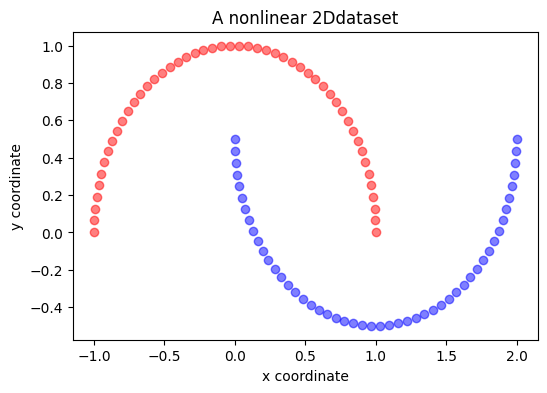

In [3]:
# very famous example of non-linearly-separable dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(6,4))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

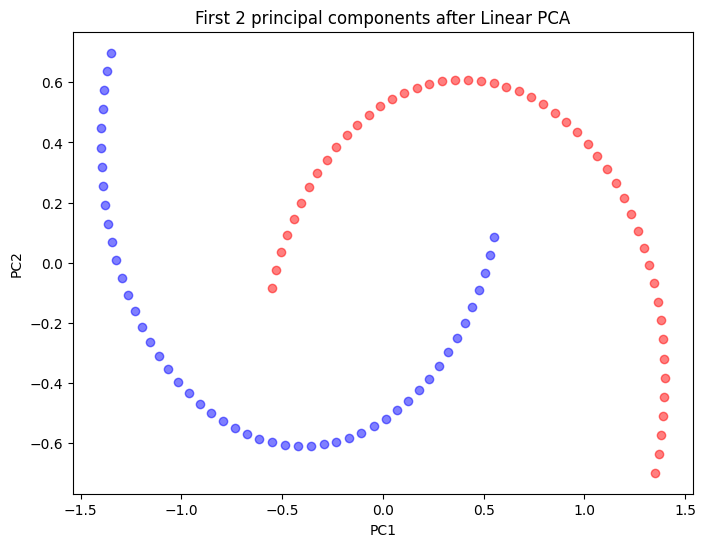

In [4]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

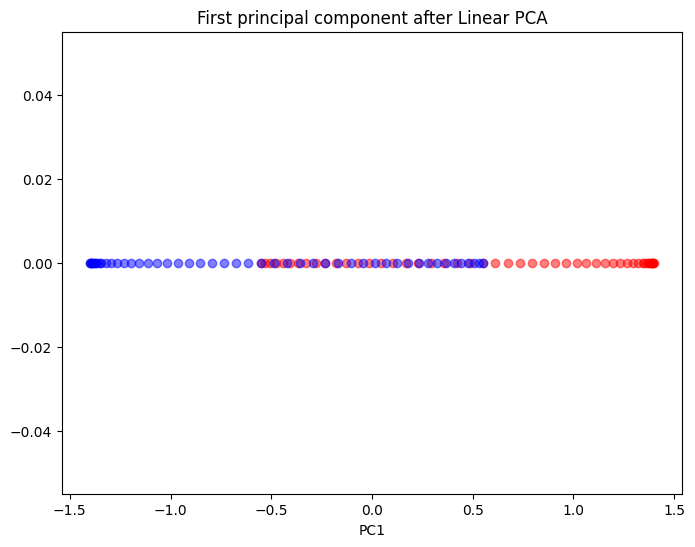

In [5]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

In [6]:
kernel_type = 'Gaussian'
param = 15

# matrix for storing the kernel 
rbf_kernel = np.zeros((X.shape[0], X.shape[0])) 
# kernel computations 
for i in range(X.shape[0]):
  for k in range(i, X.shape[0]):
    rbf_kernel[i, k] = kernelFunc(X[i, :], X[k, :], kernel_type, param)
    rbf_kernel[k, i] = rbf_kernel[i, k]

# centering
N = rbf_kernel.shape[0]
one_n = np.ones((N,N)) / N
rbf_kernel = rbf_kernel - one_n.dot(rbf_kernel) - rbf_kernel.dot(one_n) + one_n.dot(rbf_kernel).dot(one_n)

# solve the eigenvalue problem
eigvals, eigvecs = LA.eigh(rbf_kernel)
rbf_kpca = np.column_stack([eigvecs[:,-i] for i in range(1,len(eigvals)+1)])

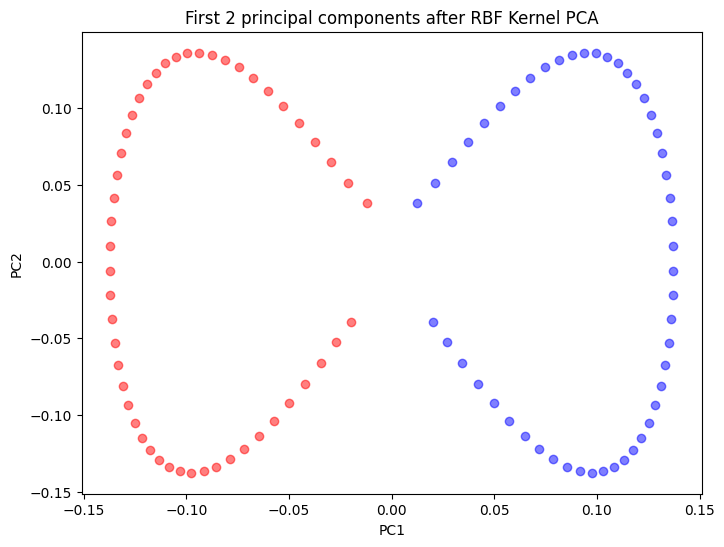

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(rbf_kpca[y==0, 0], rbf_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(rbf_kpca[y==1, 0], rbf_kpca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

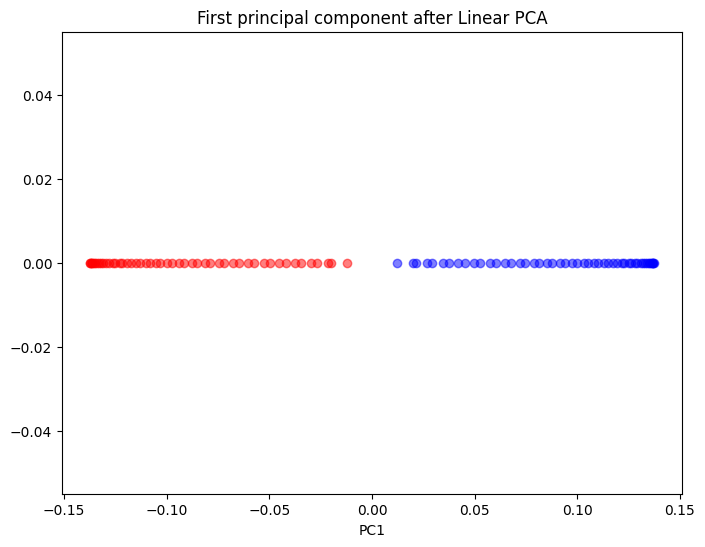

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(rbf_kpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(rbf_kpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

In [9]:
# more efficient implementation
def kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)
     

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = LA.eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack([eigvecs[:,-i] for i in range(1,n_components+1)])

    return X_pc

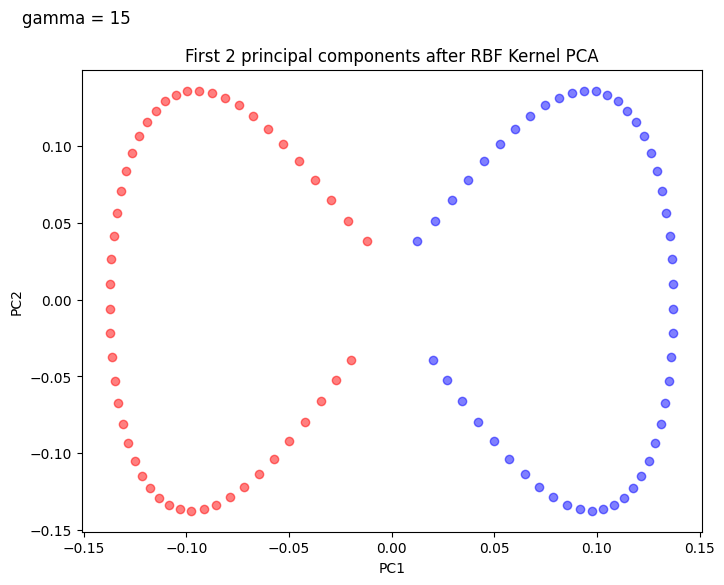

In [10]:
X_pc = kpca(X, gamma=15, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

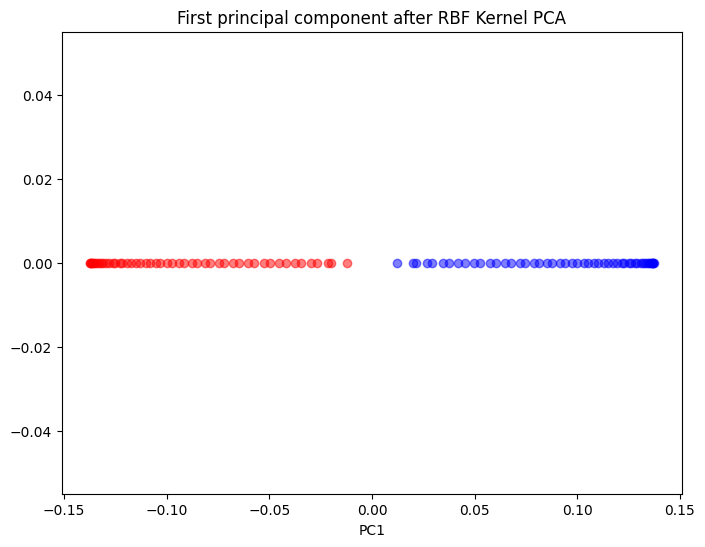

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

## Kernel SVM 

**Recall**: Suppport Vector Machines (SVM) separates data by finding an hyperplane which maximizes the margin between classes.

Kernel SVM use kernels to map data in a higher dimensional feature space, where the maximal margin hyperplane is learned. 

In [12]:
# from svm lab
def hingeFunction(z):
    return np.maximum(1-z,0)


def hingesubgrad(z):
    g = np.zeros(z.shape)
    g[z < 1] = -1
    return g

def ReghingeLoss(X,labels,w, lam):
    d = np.shape(X)[0]
    L = np.mean(np.maximum(np.ones(d) - labels*(X@w), 0)) + lam * LA.norm(w,2) 
    return L

def svmGrad(X, labels, w, lam):
    g1 = hingesubgrad(np.diag(labels)@(X@w))
    g2 = np.diag(labels)@X
    return g1.dot(g2) + 2*lam*w

def svm_training(X, labels, lam, Iter, gamma):
    # get dimensions
    d = np.shape(X)[1]
    # initialise weight vector and set first column to a random vector
    W = np.zeros((d,Iter))
    W[:,0] = np.random.normal(0,0.01,d)
    # initialise loss vector
    L = np.zeros(Iter)

    for i in range(Iter-1):
        # update weights using subgradient descent algorithm
        W[:,i+1] = W[:,i] - gamma * svmGrad(X, labels, W[:,i], lam)

        # save loss
        L[i] = ReghingeLoss(X,labels,W[:,i],lam)

    return W, L

In [13]:
# get SVM's predictions
def predlabels(X, w): 
    y = np.sign(X@w)
    return y

# calculate accuracy
def acc(labels, predlabels):
     return np.count_nonzero(labels == predlabels)/len(labels)   

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

kernel_type = 'Gaussian'
param = 15

# kernel between train points
gram_train = np.zeros((X_train.shape[0], X_train.shape[0])) 
for i in range(X_train.shape[0]):
  for k in range(X_train.shape[0]):
    gram_train[i, k] = kernelFunc(X_train[i, :], X_train[k, :], kernel_type, param)

# kernel between test and train points (used for prediction)
gram_test = np.zeros((X_test.shape[0], X_train.shape[0]))
for i in range(X_test.shape[0]):
  for k in range(X_train.shape[0]):
    gram_test[i, k] = kernelFunc(X_test[i, :], X_train[k, :], kernel_type, param)

# train SVM on kernel features
W, L = svm_training(gram_train, y_train, lam=0.01, Iter=5000, gamma=0.001)
# predict test points
y_pred = predlabels(gram_test, W[:, -1])
y_pred = (y_pred > 0).astype(int)
print('Accuracy: ', acc(y_test, y_pred))

Accuracy:  0.88


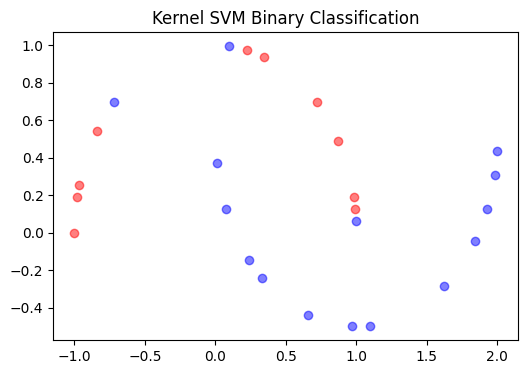

In [154]:
plt.figure(figsize=(6,4))

plt.scatter(X_test[y_pred==0, 0], X_test[y_pred==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_pred==1, 0], X_test[y_pred==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification')

plt.show()

**Sklearn Kernel SVM Function**

In [16]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=15)
svc.fit(X_train, y_train)
y_pred_sk = svc.predict(X_test)
print('Accuracy with sklearn: ', acc(y_test, y_pred_sk))

Accuracy with sklearn:  1.0


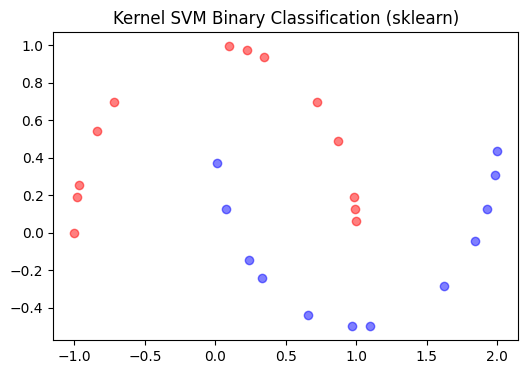

In [17]:
plt.figure(figsize=(6,4))

plt.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification (sklearn)')

plt.show()